# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [475]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential # Sequential/Functional Api
from tensorflow.keras.layers import Dense # type of layer
from tensorflow.keras import regularizers
from keras.regularizers import l1
from keras.regularizers import l2

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [476]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [477]:
df.shape

(205, 26)

In [478]:
pd.options.display.max_columns = 100
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [479]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [480]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [481]:
# dropping car_ID based
df.drop('car_ID',axis=1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [482]:
# Extracting Car Company from the CarName
df['CarName'] = df['CarName'].str.split(' ',expand=True)

In [483]:
# Renaming the typo errors in Car Company names

df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [484]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [485]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [486]:
# cleaning values for drivewheel types with the mode value
df['drivewheel']= df['drivewheel'].replace('4wd','fwd')

In [487]:
##### One-Hot Encoding of Categorical variables ######
df_str_cols = df.select_dtypes(include = 'object')
df_num_cols = df.select_dtypes(exclude = 'object')
df_str_dummies = pd.get_dummies(df_str_cols, drop_first=True)
df2 = pd.concat([df_num_cols, df_str_dummies], axis=1)
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.0,52.0,103.0,154.0,205.0
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheelbase,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
carlength,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
carwidth,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
...,...,...,...,...,...,...,...,...
fuelsystem_idi,205.0,0.097561,0.297446,0.0,0.0,0.0,0.0,1.0
fuelsystem_mfi,205.0,0.004878,0.069843,0.0,0.0,0.0,0.0,1.0
fuelsystem_mpfi,205.0,0.458537,0.499498,0.0,0.0,0.0,1.0,1.0
fuelsystem_spdi,205.0,0.043902,0.205380,0.0,0.0,0.0,0.0,1.0


In [488]:
train_dfn = df2.sample(frac=0.7, random_state=0) # will reserve 20% for validation during training
test_dfn = df2.drop(train_dfn.index)


In [489]:
# separating the target value, or “label”, from the features.
train_labels = train_dfn.pop('price')
test_labels = test_dfn.pop('price')

In [490]:
##### Data Normalization ######
mean = train_dfn.mean(axis=0)
train_dfn -= mean
std = train_dfn.std(axis=0)
train_dfn /= std

test_dfn -= mean
test_dfn /= std

test_dfn.head(65)
#train_dfn.head(65)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,-1.694494,1.825602,-1.724153,-0.429897,-0.789971,-2.119048,0.024653,0.087273,0.598972,-1.761837,-0.292316,0.223231,-0.209705,-0.678853,-0.575638,-0.207789,-0.225256,-0.189001,-0.145358,-0.189001,-0.189001,-0.168443,-0.118265,-0.313923,-0.083333,-0.225256,-0.339811,-0.241692,-0.207789,-0.145358,-0.118265,-0.168443,-0.241692,-0.41176,-0.286588,-0.207789,0.327024,-0.434468,1.129949,-0.189001,-0.693665,-0.996522,-0.376650,1.366362,-0.083333,-0.083333,-0.257301,-1.635118,-0.257301,-0.272229,-0.118265,-0.241692,0.543353,-0.364594,-0.083333,-0.083333,-0.118265,-0.749194,-0.118265,-0.327024,NaN,1.083333,-0.189001,-0.083333
9,-1.559506,-0.751718,0.133119,0.340741,0.924714,-0.773324,0.992651,0.110590,-0.686677,0.496381,-0.797337,1.439535,0.917069,-1.411649,-1.267558,4.779150,-0.225256,-0.189001,-0.145358,-0.189001,-0.189001,-0.168443,-0.118265,-0.313923,-0.083333,-0.225256,-0.339811,-0.241692,-0.207789,-0.145358,-0.118265,-0.168443,-0.241692,-0.41176,-0.286588,-0.207789,0.327024,2.285681,1.129949,-0.189001,1.431607,-0.996522,-0.376650,-0.726788,-0.083333,-0.083333,-0.257301,0.607330,-0.257301,-0.272229,-0.118265,4.108764,-1.827643,-0.364594,-0.083333,-0.083333,-0.118265,-0.749194,-0.118265,-0.327024,NaN,1.083333,-0.189001,-0.083333
17,-1.424518,-0.751718,1.922234,1.882018,2.278412,1.034992,1.859058,1.929245,1.166170,0.465017,-0.544826,1.985631,0.691714,-1.558208,-1.544325,-0.207789,4.408573,-0.189001,-0.145358,-0.189001,-0.189001,-0.168443,-0.118265,-0.313923,-0.083333,-0.225256,-0.339811,-0.241692,-0.207789,-0.145358,-0.118265,-0.168443,-0.241692,-0.41176,-0.286588,-0.207789,0.327024,-0.434468,-0.878850,-0.189001,-0.693665,0.996522,-0.376650,1.366362,-0.083333,-0.083333,-0.257301,0.607330,-0.257301,-0.272229,-0.118265,-0.241692,-1.827643,2.723731,-0.083333,-0.083333,-0.118265,-0.749194,-0.118265,-0.327024,NaN,1.083333,-0.189001,-0.083333
21,-1.357024,0.107388,-0.855155,-1.372700,-0.925340,-1.277970,-1.263456,-0.845371,-1.291688,-0.036809,-0.188787,-0.844139,0.917069,1.666091,1.361736,-0.207789,-0.225256,-0.189001,-0.145358,5.254231,-0.189001,-0.168443,-0.118265,-0.313923,-0.083333,-0.225256,-0.339811,-0.241692,-0.207789,-0.145358,-0.118265,-0.168443,-0.241692,-0.41176,-0.286588,-0.207789,0.327024,-0.434468,1.129949,-0.189001,1.431607,-0.996522,-0.376650,-0.726788,-0.083333,-0.083333,-0.257301,0.607330,-0.257301,-0.272229,-0.118265,-0.241692,0.543353,-0.364594,-0.083333,-0.083333,-0.118265,1.325498,-0.118265,-0.327024,NaN,-0.916667,-0.189001,-0.083333
25,-1.289531,0.107388,-0.855155,-1.372700,-0.925340,-1.362078,-1.046855,-0.845371,-1.291688,-0.036809,-0.191312,-0.844139,0.917069,0.786737,0.946584,-0.207789,-0.225256,-0.189001,-0.145358,5.254231,-0.189001,-0.168443,-0.118265,-0.313923,-0.083333,-0.225256,-0.339811,-0.241692,-0.207789,-0.145358,-0.118265,-0.168443,-0.241692,-0.41176,-0.286588,-0.207789,0.327024,-0.434468,-0.878850,-0.189001,-0.693665,0.996522,-0.376650,-0.726788,-0.083333,-0.083333,-0.257301,0.607330,-0.257301,-0.272229,-0.118265,-0.241692,0.543353,-0.364594,-0.083333,-0.083333,-0.118265,1.325498,-0.

In [491]:
# dropping fuelsystem_mfi with NaN values
train_dfn.drop('fuelsystem_mfi',axis=1, inplace=True)
test_dfn.drop('fuelsystem_mfi',axis=1, inplace=True)

In [532]:
###### Model with activation='relu' ######
def build_model():
    from tensorflow import keras
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu',
                           input_shape=(train_dfn.shape[1],)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu'))
    model.add(layers.Dropout(0.3))  
    model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))
    #model.compile(optimizer= 'rmsprop', loss='mse', metrics=['mae'])
    optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(optimizer= optimizer, loss='mse', metrics=['mae', 'mse'])
    return model
    
     
    # 'mae' is lesser with 'relu' than 'tanh'
    
    # KFold validation was not much effective in this case



In [540]:
model = build_model()
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_348 (Dense)            (None, 256)               16384     
_________________________________________________________________
dropout_160 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_349 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_161 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_350 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_162 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_351 (Dense)            (None, 128)             

In [541]:
example_batch = train_dfn[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.13591276],
       [-0.07079864],
       [-0.02212364],
       [-0.29045188],
       [-0.02518112],
       [-0.01739645],
       [-0.10692401],
       [-0.07570896],
       [-0.07577661],
       [-0.11077288]], dtype=float32)

In [542]:
EPOCHS = 1000

history = model.fit(
  train_dfn, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])



Epoch: 0, loss:212168372.5913,  mean_absolute_error:12516.6367,  mean_squared_error:212168352.0000,  val_loss:311352032.0000,  val_mean_absolute_error:15150.4287,  val_mean_squared_error:311352032.0000,  
....................................................................................................
Epoch: 100, loss:9681786.1826,  mean_absolute_error:2181.7263,  mean_squared_error:9681773.0000,  val_loss:6189002.5000,  val_mean_absolute_error:1719.5435,  val_mean_squared_error:6188990.0000,  
....................................................................................................
Epoch: 200, loss:5644245.6848,  mean_absolute_error:1701.6167,  mean_squared_error:5644233.0000,  val_loss:3245055.2500,  val_mean_absolute_error:1403.7062,  val_mean_squared_error:3245042.7500,  
....................................................................................................
Epoch: 300, loss:14673109.1870,  mean_absolute_error:2406.6685,  mean_squared_error:14673097.0000

Text(0, 0.5, 'MAE [Price]')

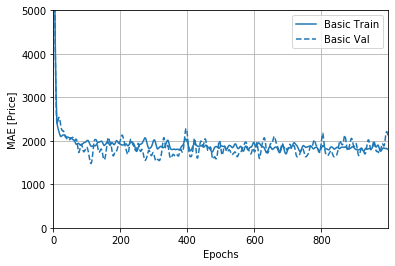

In [543]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric='mean_absolute_error')
plt.ylim([0, 5000])
plt.ylabel('MAE [Price]')

In [544]:
example_batch = test_dfn[5:6]
example_batch

example_result = model.predict(example_batch)
print(example_result)

[[8299.463]]


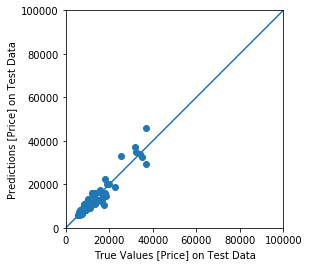

In [545]:
test_predictions = model.predict(test_dfn).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price] on Test Data')
plt.ylabel('Predictions [Price] on Test Data')
lims = [0, 100000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

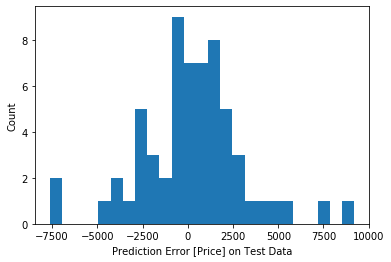

In [546]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price] on Test Data")
_ = plt.ylabel("Count")